<a href="https://colab.research.google.com/github/Saganero/machine-learning-bootcamp/blob/master/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

In [ ]:
data = df.iloc[:, [2, 1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

Podział na zbiór treningowy i testowy

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

Standaryzacja cech





In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Klasyfikator SVM - linear

In [ ]:
from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

In [7]:
classifier.score(X_test, y_test)


0.9736842105263158

TypeError: ignored

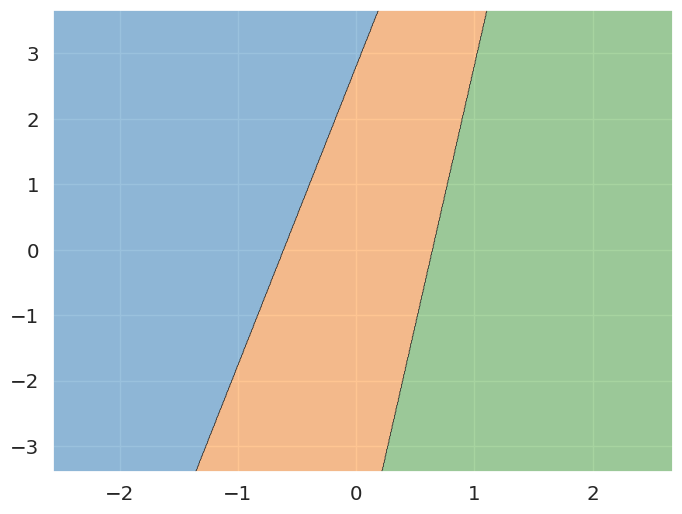

In [11]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()
     

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

Klasyfikator SVM - rbf


In [ ]:
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()